# Importing the corpus


In [1]:
import pickle

In [2]:
# corpus_fr=[]
# corpus_en=[]
# puncList = [".",";",":","!","?","/","\\",",","#","@","$","&",")","(","\"","..."]
# i=0
# with open ("train_fr.fr", "r",encoding="utf8") as myfile:
#     for line in myfile:
#         sentence=[]
#         for word in line.split(" "):
#             word=word.replace("\n","")
#             if(word not in puncList):
#                 if word.replace('.','',1).isdigit():
#                     word="DIG"
#                 sentence.append(word) 
#         corpus_fr.append(sentence)
      

       
# with open ("train_en.en", "r",encoding="utf8") as myfile:
#     for line in myfile:
#         sentence=[]
#         for word in line.split(" "):
#             word=word.replace("\n","")
#             if(word not in puncList):
#                 if word.replace('.','',1).isdigit():
#                     word="DIG"
#                 sentence.append(word) 
#         corpus_en.append(sentence)

# with open('corpus_en.pkl', 'wb') as f:
#     pickle.dump(corpus_en, f)
# with open('corpus_fr.pkl', 'wb') as f:
#     pickle.dump(corpus_fr, f)
    
corpus_en = pickle.load(open("corpus_en.pkl", "rb"))
corpus_fr = pickle.load(open("corpus_fr.pkl", "rb"))

In [3]:
len(corpus_en) == len(corpus_fr)

True

# Building the dictionary for word2Vec

In [4]:
from gensim.models import word2vec

In [5]:
# model_en=word2vec.Word2Vec(corpus_en,min_count=1)
# model_fr=word2vec.Word2Vec(corpus_fr,min_count=1)

# with open('model_en.pkl', 'wb') as f:
#     pickle.dump(model_en, f)
# with open('model_fr.pkl', 'wb') as f:
#     pickle.dump(model_fr, f)
    
model_en = pickle.load(open("model_en.pkl", "rb"))
model_fr = pickle.load(open("model_fr.pkl", "rb"))

In [6]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [7]:
X_fr = model_fr[model_fr.wv.vocab]

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [8]:
X_en = model_en[model_en.wv.vocab]

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


# PCA and Visualization

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result_fr_pca = pca.fit_transform(X_fr)

In [10]:
pca = PCA(n_components=2)
result_en_pca = pca.fit_transform(X_en)

un
deux
trois
quatre
cinq
six
sept


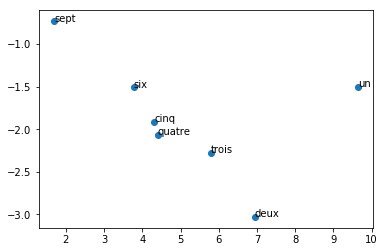

In [11]:
import numpy as np
import matplotlib.pyplot as plt
#FRENCH
# create a scatter plot of the projection
index_fr=[list(model_fr.wv.vocab).index("un"),list(model_fr.wv.vocab).index("deux"),list(model_fr.wv.vocab).index("trois"),list(model_fr.wv.vocab).index("quatre"),list(model_fr.wv.vocab).index("cinq"),list(model_fr.wv.vocab).index("six"),list(model_fr.wv.vocab).index("sept")]
result_fr=np.array([result_fr_pca[i] for i in index_fr])
plt.scatter(-result_fr[:, 0],-result_fr[:, 1])
fr_words = [ list(model_fr.wv.vocab)[i] for i in index_fr]
for i, word in enumerate(fr_words):
    print(word)
    plt.annotate(word, xy=(-result_fr[i, 0], -result_fr[i, 1]))
plt.show()

one
two
three
four
five
six
seven


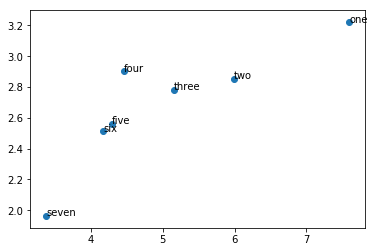

In [12]:
#ENGLISH
# create a scatter plot of the projection
index_en=[list(model_en.wv.vocab).index("one"),list(model_en.wv.vocab).index("two"),list(model_en.wv.vocab).index("three"),list(model_en.wv.vocab).index("four"),list(model_en.wv.vocab).index("five"),list(model_en.wv.vocab).index("six"),list(model_en.wv.vocab).index("seven")]
result_en=np.array([result_en_pca[i] for i in index_en])
plt.scatter(result_en[:, 0], result_en[:, 1])
en_words = [ list(model_en.wv.vocab)[i] for i in index_en]
for i, word in enumerate(en_words):
    print(word)
    plt.annotate(word, xy=(result_en[i, 0], result_en[i, 1]))
plt.show()

# Reducing Objective Function

In [13]:
english_vocab = set()
for sentence in corpus_en:
    for word in sentence:
        english_vocab.add(word)
        
french_vocab = set()
for sentence in corpus_fr:
    for word in sentence:
        french_vocab.add(word)

In [14]:
len(english_vocab)

340762

In [15]:
len(french_vocab)

409976

In [16]:
from googletrans import Translator  # Import Translator module from googletrans package
translator = Translator() # Create object of Translator.

In [17]:
translated = translator.translate('one',src="en",dest="fr")
translated.text

'un'

# Create Pairs of English-French Tuples

In [18]:
# import pickle

# word_pairs = []
# word_pairs_smaller = []

# count = 0
# for word in english_vocab:
#     print(count)
#     count += 1
#     translator = Translator()
#     french_word = translator.translate(word,src="en",dest="fr").text
#     if french_word in french_vocab:
#         word_pairs.append((word, french_word))
#         if french_word != word:
#             word_pairs_smaller.append((word, french_word))

# with open('word_pairs.pkl', 'wb') as f:
#     pickle.dump(word_pairs, f)
# with open('word_pairs_smaller.pkl', 'wb') as f:
#     pickle.dump(word_pairs_smaller, f)

In [19]:
word_pairs = pickle.load(open("word_pairs.pkl", "rb"))

In [20]:
word_pairs

[('Moktar', 'Moktar'),
 ('Respekt', 'Respekt'),
 ('trapped', 'piégé'),
 ('upturn', 'amélioration'),
 ('Cormak', 'Cormak'),
 ('Trafficked', 'Trafficking'),
 ('South-east', 'Sud-est'),
 ('Abdur', 'Abdur'),
 ('Hayes', 'Hayes'),
 ('webmasters', 'webmasters'),
 ('Nasimi', 'Nasimi'),
 ('Ahsan', 'Ahsan'),
 ('Rejected', 'Rejeté'),
 ('jaunty', 'désinvolte'),
 ('Sonde', 'Sonde'),
 ('Edmondson', 'Edmondson'),
 ('réunion', 'réunion'),
 ('kettles', 'bouilloires'),
 ('Alright', 'Bien'),
 ('chisels', 'ciseaux'),
 ('moist', 'humide'),
 ('materialized', 'matérialisé'),
 ('Beaudry', 'Beaudry'),
 ('Toute', 'Toute'),
 ('Yehudit', 'Yehudit'),
 ('hercampuri', 'hercampuri'),
 ('Dalcourt', 'Dalcourt'),
 ('Chelomei', 'Chelomei'),
 ('Pugliese', 'Pugliese'),
 ('www.nhs.uk', 'www.nhs.uk'),
 ('Reihe', 'Reihe'),
 ('sportsperson', 'sportif'),
 ('Check-Out', 'Check-out'),
 ('hexagons', 'hexagones'),
 ('sclera', 'sclérotique'),
 ('Eshie', 'Eshie'),
 ('FUDECO', 'FUDECO'),
 ('revisitées', 'revisitées'),
 ('SPF-105P', 'S

# Least Square Method of Solving Transormation Matrix on 2D data

In [21]:
def generateMat(size, dimm):
    en_list = list(model_en.wv.vocab)
    fr_list = list(model_fr.wv.vocab)

    A = np.zeros((dimm*size, dimm*dimm))
    b = np.zeros((dimm*size, 1))

    count = 0
    inds = np.random.choice(len(word_pairs),size=size,replace=False)
    for i in range(len(inds)):
        word_pair = word_pairs[inds[i]]
        word_en = word_pair[0]
        word_fr = word_pair[1]
#         en_emb = X_en[en_list.index(word_en)]
#         fr_emb = X_fr[fr_list.index(word_fr)]
        en_emb = result_en_pca[en_list.index(word_en)]
        fr_emb = result_fr_pca[fr_list.index(word_fr)]
        
        for j in range(dimm):
            A[i*dimm+j,j*dimm:(j+1)*dimm] = en_emb
            b[i*dimm+j] = fr_emb[j]
        
        if count % 100 == 0:
            print(count)
        count += 1

    A_trans = np.transpose(A)
    coef = np.dot(np.dot(np.linalg.inv(np.dot(A_trans, A)), A_trans), b)

    transform_mat = coef.reshape((dimm,dimm))
    

    return transform_mat

In [22]:
mat = generateMat(1000,2)

0
100
200
300
400
500
600
700
800
900


In [23]:
def transform(emb):
    out_emb = np.dot(mat, emb.reshape((len(emb),1)))
    return out_emb.flatten()

one
two
three
four
five
six
seven
un
deux
trois
quatre
cinq
six
sept


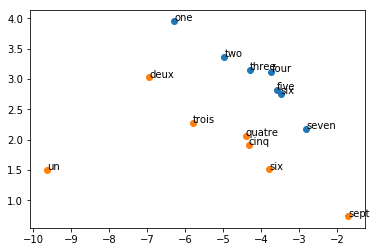

In [24]:
#ENGLISH
# create a scatter plot of the projection
index_en=[list(model_en.wv.vocab).index("one"),list(model_en.wv.vocab).index("two"),list(model_en.wv.vocab).index("three"),list(model_en.wv.vocab).index("four"),list(model_en.wv.vocab).index("five"),list(model_en.wv.vocab).index("six"),list(model_en.wv.vocab).index("seven")]
result_en=np.array([transform(result_en_pca[i]) for i in index_en])
plt.scatter(result_en[:, 0], result_en[:, 1])
en_words = [ list(model_en.wv.vocab)[i] for i in index_en]
for i, word in enumerate(en_words):
    print(word)
    plt.annotate(word, xy=(result_en[i, 0], result_en[i, 1]))
# plt.show()

index_fr=[list(model_fr.wv.vocab).index("un"),list(model_fr.wv.vocab).index("deux"),list(model_fr.wv.vocab).index("trois"),list(model_fr.wv.vocab).index("quatre"),list(model_fr.wv.vocab).index("cinq"),list(model_fr.wv.vocab).index("six"),list(model_fr.wv.vocab).index("sept")]
result_fr=np.array([result_fr_pca[i] for i in index_fr])
plt.scatter(result_fr[:, 0],result_fr[:, 1])
fr_words = [ list(model_fr.wv.vocab)[i] for i in index_fr]
for i, word in enumerate(fr_words):
    print(word)
    plt.annotate(word, xy=(result_fr[i, 0], result_fr[i, 1]))
plt.show()

In [25]:
word_arr = np.array(list(model_fr.wv.vocab))
en_list = list(model_en.wv.vocab)
def predict_2d(word_en,topWords):
    en_emb = result_en_pca[en_list.index(word_en)]
    translator = Translator()
    french_word = translator.translate(word_en,src="en",dest="fr").text
    return list(word_arr[np.argsort(np.sum((result_fr_pca - transform(en_emb)) ** 2,axis=1))[:topWords]]), french_word

In [26]:
predict_2d('porch',5)

(['griffes', 'billions', 'dépressions', 'réceptions', 'nervures'], 'porche')

# Dynet Method of solving N-DIMM transformation matrix

In [27]:
DIMM = X_en.shape[1]

In [28]:
import _dynet as dy
dyparams = dy.DynetParams()
dyparams.set_mem(2048)
dyparams.set_autobatch(True)
dyparams.init()

# create a parameter collection and add the parameters.
m = dy.ParameterCollection()
pW = m.add_parameters((DIMM,DIMM))
pb = m.add_parameters((DIMM))

dy.renew_cg() # new computation graph. not strictly needed here, but good practice.

# associate the parameters with cg Expressions
W = dy.parameter(pW)
b = dy.parameter(pb)

In [29]:
x = dy.vecInput(DIMM) # an input vector of size 2. Also an expression.
y = dy.vecInput(DIMM)
output = W*x

In [30]:
# SIZE = len(word_pairs)

# trainer = dy.SimpleSGDTrainer(m)

# en_list = list(model_en.wv.vocab)
# fr_list = list(model_fr.wv.vocab)


# EPOCHS = 5

# for epoch in range(EPOCHS):
#     inds = np.random.choice(len(word_pairs),size=SIZE,replace=False)
#     total_loss = 0
#     seen_instances = 0
#     for i in range(len(inds)):
#         word_pair = word_pairs[inds[i]]
#         word_en = word_pair[0]
#         word_fr = word_pair[1]
#         en_emb = X_en[en_list.index(word_en)]
#         fr_emb = X_fr[fr_list.index(word_fr)]

#         x.set(en_emb)
#         y.set(fr_emb)

#         loss = dy.squared_distance(output,y)
#         seen_instances += 1
#         total_loss += loss.value()
#         loss.backward()
#         trainer.update()
#         if (seen_instances > 1 and seen_instances % 1000 == 0):
#             print ("average loss is:",total_loss / seen_instances)
#             seen_instances = 0
#             total_loss = 0

# mat = W.value()

# with open('mat.pkl', 'wb') as f:
#     pickle.dump(mat, f)
    
mat = pickle.load(open("mat.pkl", "rb"))

# Better Prediction Method

In [31]:
word_arr = np.array(list(model_fr.wv.vocab))
X_fr_mag = np.sum(X_fr**2,axis=1)**0.5
def predict_cosineSim(word_en,topWords):
    en_emb = X_en[en_list.index(word_en)]
    out = np.dot(mat,en_emb.reshape((DIMM,1))).flatten()
    translator = Translator()
    french_word = translator.translate(word_en,src="en",dest="fr").text
    
    out_mag = np.sum(out**2)**0.5
    cos_sim = np.sum((X_fr * out),axis=1)/(X_fr_mag*out_mag)
    return list(word_arr[np.argsort(cos_sim)[::-1][:topWords]]), french_word

In [32]:
predict_cosineSim('chocolate',5)

(['agrumes', 'biscuits', 'gâteaux', 'sauces', 'saucisses'], 'Chocolat')

# Worse Prediction Method

In [33]:
word_arr = np.array(list(model_fr.wv.vocab))
def predict_closest(word_en,topWords):
    en_emb = X_en[en_list.index(word_en)]
    out = np.dot(mat,en_emb.reshape((DIMM,1))).flatten()
    translator = Translator()
    french_word = translator.translate(word_en,src="en",dest="fr").text
    
    return list(word_arr[np.argsort(np.sum((X_fr - out) ** 2,axis=1))[:topWords]]), french_word

In [34]:
predict_closest('chocolate',5)

(['biscuits', 'gâteaux', 'citron', 'fromages', 'agrumes'], 'Chocolat')